In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:
def rgb2gray(img):
    gray = 0.2126*img[...,2]+0.7152*img[...,1]+0.0722*img[...,0]
    return gray

# 二値化

In [3]:
def binarization(img,th=128):
    out = img.copy()
    out[out<th] = 0
    out[out>=th] = 255
    return out

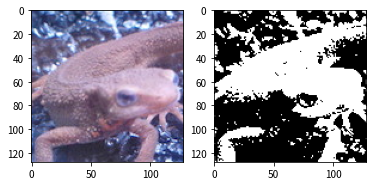

In [6]:
img = cv2.imread("./img/imori.jpg")
# grayscale
gray_img = rgb2gray(img)
# binarization
out = binarization(gray_img)

# matplotlibに表示するためにBGRをRGBに変換
plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# grayscale画像を表示
plt.subplot(1,2,2)
plt.imshow(out,cmap="gray")
plt.show()

# 大津の二値化

In [22]:
def ootu_binarization(img):
    H,W = img.shape
    # 最適な閾値とそのときの分散
    best_th = 0
    max_sb = 0
    
    for th in range(1,256):
        c0 = img[img<th]
        c1 = img[img>=th]
        # w0, w1を計算
        w0 =  len(c0)
        w1 =  len(c1)
        w0/=(H*W)
        w1/=(H*W)
        # 各クラスの平均を計算
        mu0 = np.mean(c0) if len(c0)>0 else 0
        mu1 = np.mean(c1) if len(c1)>0 else 0
        
        # クラス倍分散を計算
        sb = w0*w1*((mu0-mu1)**2)
        
        # 分散最大のとき更新
        if sb>max_sb:
            best_th = th
            max_sb=sb
    
    print("best threshold : "+str(best_th))
    
    out = binarization(img,best_th)
    return out

best threshold : 127


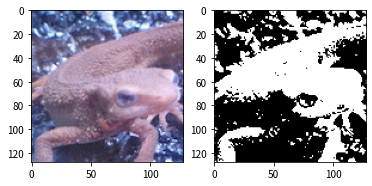

In [23]:
img = cv2.imread("./img/imori.jpg")
# grayscale
gray_img = rgb2gray(img)
# binarization
out = ootu_binarization(gray_img)

# matplotlibに表示するためにBGRをRGBに変換
plt.figure(facecolor="white")
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# grayscale画像を表示
plt.subplot(1,2,2)
plt.imshow(out,cmap="gray")
plt.show()